# EDA: Taxi Rides in Chicago

<div style="border: 2px solid black; padding: 10px; margin: 10px">

The intention of this analysis is to provide insight on customer preference in terms of ride-sharing company and the impact of external factors on rides. We want to uncover patterns in this data and analyze competitors performance by testing hypotheses regarding the impact of weather on ride frequency.

</div>

## Packages & Libraries

In [6]:
# Importing required packages and libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Primary Data Processing: doc1

#### Import & Preview

In [11]:
# Importing first CSV file (1/2)

doc1 = pd.read_csv('sql_project_1.csv')

In [12]:
# Viewing first five rows to preview data

print(doc1.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


<div style="border: 2px solid black; padding: 10px; margin: 10px">

At first glance, doc1 contains two columns, "company_name" and "trips_amount".<br>
Nothing standing out as out of the ordinary or formatted incorrectly.

</div>

#### Column Label Validation

In [16]:
# Printing column labels to validate formatting

doc1.columns

Index(['company_name', 'trips_amount'], dtype='object')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No unnecessary spaces, all lowercase and in proper format.

</div>

#### Calling info()

In [20]:
# Printing info() for doc1

doc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<div style="border: 2px solid black; padding: 10px; margin: 10px">

After viewing info() on 'doc1', we're seeing no NULL values.<br>
Data types are also appropriate for the data they're representing.

</div>

#### Checking for Duplicates

In [24]:
# Checking for duplicates

doc1.duplicated().sum()

0

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No duplicates present in 'doc1'

</div>

### Primary Data Processing: doc2

#### Import & Preview

In [30]:
# Importing second CSV file (2/2)

doc2 = pd.read_csv('sql_project_2.csv')

In [31]:
# Viewing first five rows to preview data

print(doc2.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


<div style="border: 2px solid black; padding: 10px; margin: 10px">

At first glance, doc2 contains two columns, "dropoff_location_name" and "average_trips".<br>
No significant discrepancies in formatting present.

</div>

#### Column Label Validation

In [35]:
# Printing column labels to validate formatting

doc2.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No unnecessary spaces, all lowercase and in proper format.

</div>

#### Calling info()

In [39]:
# Printing info() for doc2

doc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<div style="border: 2px solid black; padding: 10px; margin: 10px">

After viewing info() on 'doc2', we're also seeing no NULL values.<br>
Data types are also appropriate for the data they're representing.

</div>

#### Checking for Duplicates

In [43]:
# Checking for duplicates

doc2.duplicated().sum()

0

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No duplicates present in 'doc2'

</div>

## Analysis

### Top 10 Companies

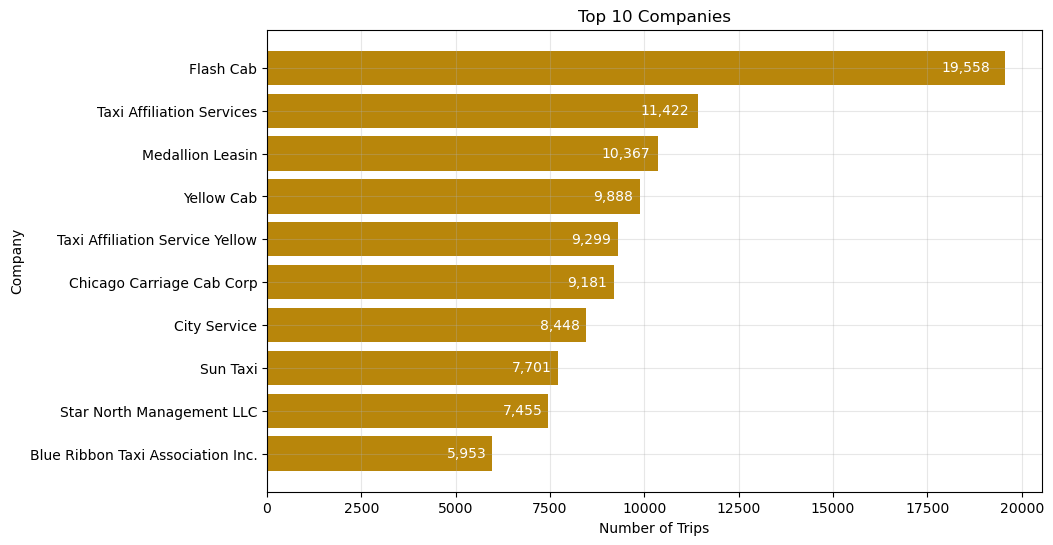

In [49]:
# Top 10 Companies with the most trips

# Sorting values descending to extract top 10
doc1_sorted = doc1.sort_values('trips_amount', ascending=False)

# Splitting data to include only top 10
doc1_top10 = doc1_sorted.head(10)

# Setting variables to Categories & Values of the bar chart
cats = doc1_top10['company_name']
vals = doc1_top10['trips_amount']

# Setting customizations for the chart
plt.figure(figsize=(10, 6))
bars1 = plt.barh(cats, vals, color='darkgoldenrod')
plt.title('Top 10 Companies')
plt.xlabel('Number of Trips')
plt.ylabel('Company')
plt.grid(axis='both', alpha=0.3)

# Inverting y-axis for better readability
plt.gca().invert_yaxis()

# Adding labels to bars
for bar in bars1:
    width = bar.get_width()
    plt.text(width - 0.02 * width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
             ha='right', va='center', fontsize=10, color='white')

plt.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

We're seeing one clear company that is utilized for almost twice the amount of the second place company: "Flash Cab" leads the top 10 with 19,558 trips between Nov. 15 and 16, 2017. 

</div>

### Top 10 Dropoff Locations

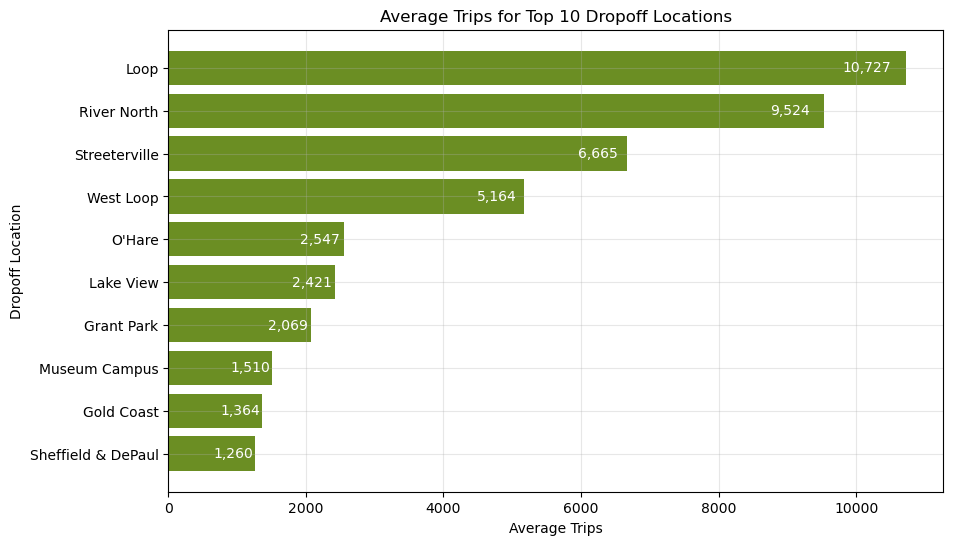

In [54]:
# Top 10 Dropoff Locations

# Sorting values descending to extract top 10
doc2_sorted = doc2.sort_values('average_trips', ascending=False)

# Splitting data to include only top 10
doc2_top10 = doc2_sorted.head(10)

# Setting variables to Categories & Values of the bar chart
cats = doc2_top10['dropoff_location_name']
vals = doc2_top10['average_trips']

# Setting customizations for the chart
plt.figure(figsize=(10, 6))
bars2 = plt.barh(cats, vals, color='olivedrab')
plt.title('Average Trips for Top 10 Dropoff Locations')
plt.xlabel('Average Trips')
plt.ylabel('Dropoff Location')
plt.grid(axis='both', alpha=0.3)

# Inverting y-axis for better readability
plt.gca().invert_yaxis()

# Adding labels to bars
for bar in bars2:
    width = bar.get_width()
    plt.text(width - 0.02 * width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
             ha='right', va='center', fontsize=10, color='white')

plt.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

This bar chart is displaying the Top 10 Dropoff Locations from our dataset. The "Loop" and "River North" are the chosen the most as dropoff locations. "Streeterville" and "West Loop" are the second two most requested dropoff locations and after that the occurrences decrease substantially.  

</div>

### Visualizations Summary

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Based on both visualizations above, we can tell that customers are partial to "Flash Cab" as their preferred ride-sharing company. We're also seeing the "Loop" and "River North" as the most frequented dropoff locations: is this due to their centralized locations in downtown Chicago or do they simply have more accessibility when there's inclement weather? Further investigation will help us answer these questions.

</div>

## Hypothesis Testing

### Primary Data Processing: doc3

#### Import & Preview

In [65]:
# Introducing a third dataset with specified data on rides from the "Loop" to O'Hare International Airport

doc3 = pd.read_csv('sql_project_3.csv')

In [66]:
# Viewing first five rows to preview data

print(doc3.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


<div style="border: 2px solid black; padding: 10px; margin: 10px">

At first glance, doc3 contains three columns, "start_ts", "weather_conditions", "duration_seconds".<br>
No significant discrepancies in formatting present.

</div>

#### Column Label Validation

In [70]:
# Printing column labels to validate formatting

doc3.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No unnecessary spaces, all lowercase and in proper format.

</div>

#### Calling info()

In [74]:
# Printing info() for doc3

doc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<div style="border: 2px solid black; padding: 10px; margin: 10px">

After viewing info() on 'doc3', we're seeing no NULL values.<br>
Data types are appropriate for "weather_conditions" and "duration_seconds".<br>
"start_ts" looks to be a timestamp but has the datatype as "object", this will need to be adjusted.

</div>

#### Converting to Datetime

In [78]:
# Converting "start_ts" column to 'datetime' format

doc3['start_ts'] = pd.to_datetime(doc3['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [79]:
# Validating changes have been made to doc3['start_ts']

doc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


#### Checking for Duplicates

In [82]:
# Checking for duplicates

doc3.duplicated().value_counts()

False    871
True     197
Name: count, dtype: int64

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Duplicates present in doc3.<br>
This is to be expected since for our 'weather_conditions' column we only have values of 'Good' or 'Bad'.

</div>

### Hypothesis Formulation

<div style="border: 2px solid black; padding: 10px; margin: 10px">

**Null Hypothesis:**<br>
There is no change in the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.<br>

**Alternate Hypothesis:**<br>
The average duration of rides from the Loop to O'Hard International Airport changes on rainy Saturdays.<br>

Significance Level (Alpha): **<u>0.05</u>**<br>
(Choosing this alpha accepting a 5% risk for error in incorrectly rejecting the Null.)

</div>

<div style="border: 2px solid black; padding: 10px; margin: 10px">

<u>To test these hypotheses, we need to</u>:
* Isolate our date range to Saturdays
* Extract the weather conditions for rainy weather only

</div>

In [89]:
# Filtering data for only Saturdays and 'Bad' weather conditions

# Filtering df to include only entries on Saturday & Bad weather
doc3_sats_bad = doc3[(doc3['start_ts'].dt.weekday == 5) & (doc3['weather_conditions'] == 'Bad')]

# Filtering for all other values that are *not* Saturday & Bad weather
doc3_all_other = doc3[~((doc3['start_ts'].dt.weekday == 5) & (doc3['weather_conditions'] == 'Bad'))]

In [90]:
# Setting up and running the test for the Null Hypothesis

t_stat, p_value = ttest_ind(doc3_sats_bad['duration_seconds'], doc3_all_other['duration_seconds'], nan_policy='omit')

# Setting alpha threshold
alpha = 0.05

# Printing t-Stat & p-Value
print(f"T-Stat: {t_stat}, p-Value: {p_value}")
print()

# Results interpretation
if p_value < alpha:
    print("Reject the Null: There is a change in the average duration of rides from the Loop to O'Hare on rainy Saturdays.")
else:
    print("Fail to reject the Null: There is no significant difference in average ride duration from the Loop to O'Hare on rainy Saturdays.")

T-Stat: 6.946177714041499, p-Value: 6.517970327099473e-12

Reject the Null: There is a change in the average duration of rides from the Loop to O'Hare on rainy Saturdays.


## Insights & Conclusions

<div style="border: 2px solid black; padding: 10px; margin: 10px">

After analysis of the data on most popular dropoff locations and rideshare companies, we can narrow our focus on **Flash Cab** and the dropoff locations of the **Loop** and **River North**. Further investigation should be conducted to the infrastructure and business model that **Flash Cab** utilizes as this seems to be successful and effective in the Chicago market. It would benefit greatly for a <u>new</u> rideshare company to include the **Loop** and **River North** dropoff points in their service.

In terms of our hypothesis testing regarding weather and ride duration, it appears that with inclement weather, ride duration is different than in typical weather conditions. We can **reject** the Null Hypothesis and measure a statistically significant result between ride duration and bad weather. Research and Development for any new rideshare company should be exploring options that can ease or enhance the customer experience using their company during times of bad weather. Paying close attention to this would definitely set them apart from competitors and help increase revenue.

</div>